This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

In [3]:
train_images.shape

(60000, 784)

In [4]:
train_images_with_noise_channels.shape

(60000, 1568)

In [5]:
train_images_with_zeros_channels.shape

(60000, 1568)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_origin = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 4ms/step - loss: 0.6028 - accuracy: 0.8126 - val_loss: 0.2883 - val_accuracy: 0.9136
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2516 - accuracy: 0.9208 - val_loss: 0.2151 - val_accuracy: 0.9388
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1641 - accuracy: 0.9501 - val_loss: 0.1773 - val_accuracy: 0.9499
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1187 - accuracy: 0.9629 - val_loss: 0.1269 - val_accuracy: 0.9617
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0853 - accuracy: 0.9730 - val_loss: 0.1206 - val_accuracy: 0.9643
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0630 - accuracy: 0.9806 - val_loss: 0.1540 - val_accuracy: 0.9567
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0468 - accuracy: 0.9848 - val_loss: 0.1246 - val_accuracy: 0.9652
Epoch 

**Plotting a validation accuracy comparison**

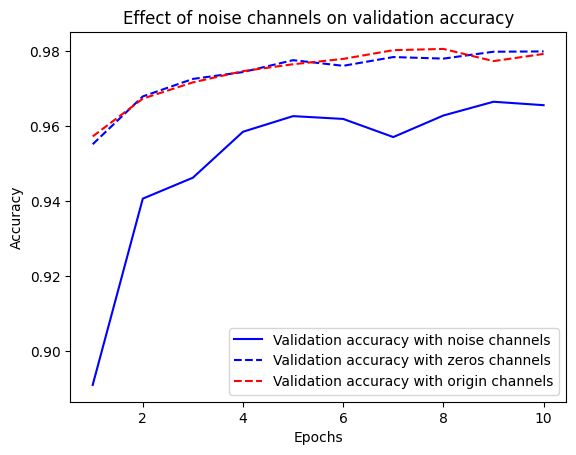

In [13]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
val_acc_origin = history_origin.history["val_accuracy"]

epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.plot(epochs, val_acc_origin, "r--",
         label="Validation accuracy with origin channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

performance is not very good. feature engineering 이 효과적이라는 의미. 노이즈 들어가면 정확도가 낮아진다.

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [15]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
shuffle_model = model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 2.3149 - accuracy: 0.1054 - val_loss: 2.3089 - val_accuracy: 0.1039
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2985 - accuracy: 0.1163 - val_loss: 2.3134 - val_accuracy: 0.0996
Epoch 3/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2895 - accuracy: 0.1282 - val_loss: 2.3206 - val_accuracy: 0.1016
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2786 - accuracy: 0.1394 - val_loss: 2.3290 - val_accuracy: 0.0997
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2632 - accuracy: 0.1503 - val_loss: 2.3424 - val_accuracy: 0.1004
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2425 - accuracy: 0.1667 - val_loss: 2.3488 - val_accuracy: 0.1020
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2205 - accuracy: 0.1792 - val_loss: 2.3644 - val_accuracy: 0.1012

training accuarcy는 계속 오르는데, val accuary는 오르지 않는 모습

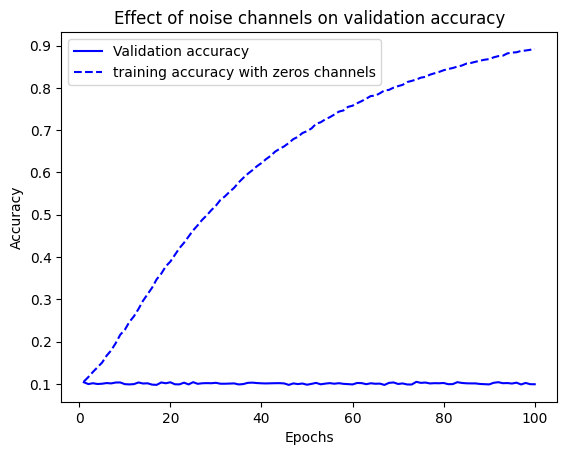

In [19]:
import matplotlib.pyplot as plt
val_acc_shuffle = shuffle_model.history["val_accuracy"]
train_acc_shuffle = shuffle_model.history["accuracy"]

epochs = range(1, 101)
plt.plot(epochs, val_acc_shuffle, "b-",
         label="Validation accuracy")
plt.plot(epochs, train_acc_shuffle, "b--",
         label="training accuracy with zeros channels")

plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [20]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 3ms/step - loss: 644.6942 - accuracy: 0.3252 - val_loss: 2.4713 - val_accuracy: 0.2862
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 3.0412 - accuracy: 0.2184 - val_loss: 2.1165 - val_accuracy: 0.2186
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 3.4427 - accuracy: 0.2024 - val_loss: 2.1806 - val_accuracy: 0.2000
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 2.4818 - accuracy: 0.2098 - val_loss: 2.1090 - val_accuracy: 0.2198
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.5765 - accuracy: 0.2072 - val_loss: 2.2402 - val_accuracy: 0.2000
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.6600 - accuracy: 0.2003 - val_loss: 3.2393 - val_accuracy: 0.2409
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3970 - accuracy: 0.2099 - val_loss: 2.2121 - val_accuracy: 0.2868
Epoc

**The same model with a more appropriate learning rate**

In [21]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 3ms/step - loss: 0.3337 - accuracy: 0.9141 - val_loss: 0.1587 - val_accuracy: 0.9578
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1246 - accuracy: 0.9655 - val_loss: 0.1350 - val_accuracy: 0.9689
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0978 - accuracy: 0.9740 - val_loss: 0.1561 - val_accuracy: 0.9657
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0817 - accuracy: 0.9787 - val_loss: 0.1872 - val_accuracy: 0.9667
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0630 - accuracy: 0.9836 - val_loss: 0.1689 - val_accuracy: 0.9720
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0608 - accuracy: 0.9847 - val_loss: 0.2311 - val_accuracy: 0.9630
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0568 - accuracy: 0.9871 - val_loss: 0.2085 - val_accuracy: 0.9718
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [22]:
model = keras.Sequential([layers.Dense(10, activation="softmax")]) #simple logistic regression
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.6748 - accuracy: 0.8294 - val_loss: 0.3624 - val_accuracy: 0.9044
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3544 - accuracy: 0.9007 - val_loss: 0.3109 - val_accuracy: 0.9143
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3185 - accuracy: 0.9109 - val_loss: 0.2923 - val_accuracy: 0.9187
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3022 - accuracy: 0.9158 - val_loss: 0.2840 - val_accuracy: 0.9217
Epoch 5/20
375/375 [==============================] - 2s 4ms/step - loss: 0.2922 - accuracy: 0.9178 - val_loss: 0.2792 - val_accuracy: 0.9237
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2855 - accuracy: 0.9204 - val_loss: 0.2755 - val_accuracy: 0.9235
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2806 - accuracy: 0.9215 - val_loss: 0.2722 - val_accuracy: 0.9248
Epoch 

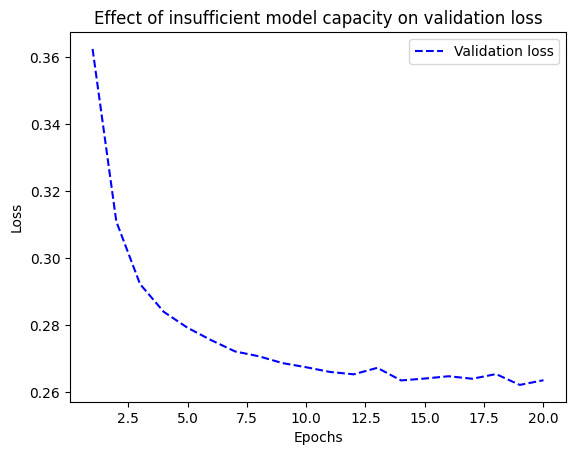

In [23]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

overfitting situation 의 증거를 찾을 수 없다.

In [24]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
]) # large model
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 4ms/step - loss: 0.3728 - accuracy: 0.8956 - val_loss: 0.1923 - val_accuracy: 0.9432
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1663 - accuracy: 0.9509 - val_loss: 0.1497 - val_accuracy: 0.9571
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1170 - accuracy: 0.9645 - val_loss: 0.1216 - val_accuracy: 0.9649
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0902 - accuracy: 0.9727 - val_loss: 0.1116 - val_accuracy: 0.9663
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0729 - accuracy: 0.9782 - val_loss: 0.1004 - val_accuracy: 0.9722
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0607 - accuracy: 0.9819 - val_loss: 0.0971 - val_accuracy: 0.9719
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0503 - accuracy: 0.9846 - val_loss: 0.1059 - val_accuracy: 0.9703
Epoch 

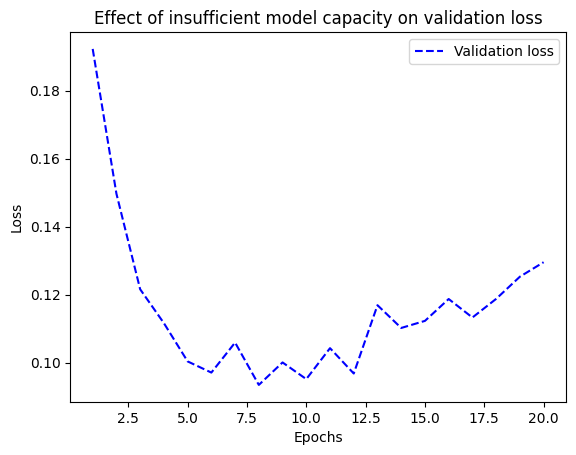

In [26]:
import matplotlib.pyplot as plt
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

lowest는 large 모델에서 나옴. early stop 해서 거기서 멈추면 좋을듯?

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [4]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=10, batch_size=128, validation_split=0.4)

Epoch 1/10
118/118 [==============================] - 4s 24ms/step - loss: 0.4288 - accuracy: 0.8178 - val_loss: 0.2965 - val_accuracy: 0.8861
Epoch 2/10
118/118 [==============================] - 1s 7ms/step - loss: 0.2266 - accuracy: 0.9167 - val_loss: 0.2735 - val_accuracy: 0.8912
Epoch 3/10
118/118 [==============================] - 1s 8ms/step - loss: 0.1668 - accuracy: 0.9405 - val_loss: 0.3464 - val_accuracy: 0.8639
Epoch 4/10
118/118 [==============================] - 1s 8ms/step - loss: 0.1287 - accuracy: 0.9550 - val_loss: 0.3261 - val_accuracy: 0.8843
Epoch 5/10
118/118 [==============================] - 1s 8ms/step - loss: 0.1021 - accuracy: 0.9657 - val_loss: 0.3654 - val_accuracy: 0.8808
Epoch 6/10
118/118 [==============================] - 1s 8ms/step - loss: 0.0800 - accuracy: 0.9747 - val_loss: 0.4126 - val_accuracy: 0.8766
Epoch 7/10
118/118 [==============================] - 2s 14ms/step - loss: 0.0613 - accuracy: 0.9799 - val_loss: 0.4540 - val_accuracy: 0.8735
Epoc

**Version of the model with lower capacity**

In [5]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=10, batch_size=128, validation_split=0.4)

Epoch 1/10
118/118 [==============================] - 3s 21ms/step - loss: 0.5305 - accuracy: 0.8173 - val_loss: 0.4154 - val_accuracy: 0.8720
Epoch 2/10
118/118 [==============================] - 1s 7ms/step - loss: 0.3355 - accuracy: 0.8963 - val_loss: 0.3147 - val_accuracy: 0.8838
Epoch 3/10
118/118 [==============================] - 1s 7ms/step - loss: 0.2437 - accuracy: 0.9181 - val_loss: 0.2789 - val_accuracy: 0.8890
Epoch 4/10
118/118 [==============================] - 1s 11ms/step - loss: 0.1903 - accuracy: 0.9321 - val_loss: 0.2676 - val_accuracy: 0.8946
Epoch 5/10
118/118 [==============================] - 1s 8ms/step - loss: 0.1566 - accuracy: 0.9448 - val_loss: 0.2822 - val_accuracy: 0.8879
Epoch 6/10
118/118 [==============================] - 1s 10ms/step - loss: 0.1334 - accuracy: 0.9553 - val_loss: 0.2844 - val_accuracy: 0.8922
Epoch 7/10
118/118 [==============================] - 1s 11ms/step - loss: 0.1145 - accuracy: 0.9635 - val_loss: 0.3050 - val_accuracy: 0.8867
Ep

**Version of the model with higher capacity**

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=10, batch_size=128, validation_split=0.4)

Epoch 1/10
118/118 [==============================] - 3s 19ms/step - loss: 0.4063 - accuracy: 0.8173 - val_loss: 0.3137 - val_accuracy: 0.8715
Epoch 2/10
118/118 [==============================] - 1s 9ms/step - loss: 0.1988 - accuracy: 0.9209 - val_loss: 0.2834 - val_accuracy: 0.8848
Epoch 3/10
118/118 [==============================] - 1s 13ms/step - loss: 0.0969 - accuracy: 0.9659 - val_loss: 0.5782 - val_accuracy: 0.8265
Epoch 4/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0408 - accuracy: 0.9875 - val_loss: 0.4645 - val_accuracy: 0.8769
Epoch 5/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0146 - accuracy: 0.9963 - val_loss: 0.5792 - val_accuracy: 0.8827
Epoch 6/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0050 - accuracy: 0.9985 - val_loss: 0.6303 - val_accuracy: 0.8811
Epoch 7/10
118/118 [==============================] - 1s 9ms/step - loss: 5.5955e-04 - accuracy: 0.9999 - val_loss: 0.8182 - val_accuracy: 0.8815

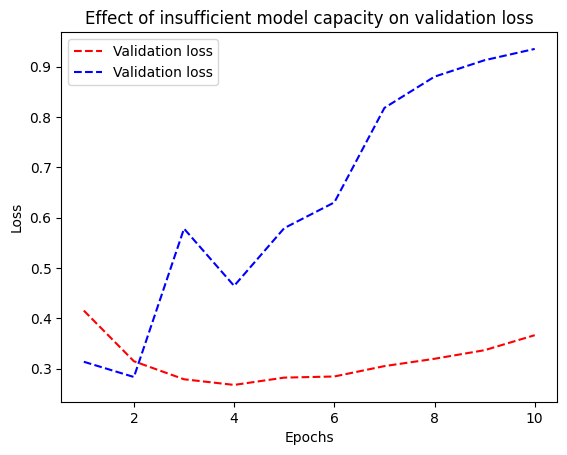

In [9]:
import matplotlib.pyplot as plt
small_val_loss = history_smaller_model.history["val_loss"]
large_val_loss = history_larger_model.history["val_loss"]
epochs = range(1, 11)
plt.plot(epochs, small_val_loss, "r--",
         label="Validation loss")
plt.plot(epochs, large_val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [10]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=10, batch_size=128, validation_split=0.4)

Epoch 1/10
118/118 [==============================] - 3s 23ms/step - loss: 0.4688 - accuracy: 0.8426 - val_loss: 0.3593 - val_accuracy: 0.8871
Epoch 2/10
118/118 [==============================] - 1s 8ms/step - loss: 0.3092 - accuracy: 0.9102 - val_loss: 0.4988 - val_accuracy: 0.8217
Epoch 3/10
118/118 [==============================] - 1s 7ms/step - loss: 0.2732 - accuracy: 0.9254 - val_loss: 0.3839 - val_accuracy: 0.8752
Epoch 4/10
118/118 [==============================] - 1s 8ms/step - loss: 0.2552 - accuracy: 0.9339 - val_loss: 0.3759 - val_accuracy: 0.8797
Epoch 5/10
118/118 [==============================] - 1s 7ms/step - loss: 0.2465 - accuracy: 0.9339 - val_loss: 0.4017 - val_accuracy: 0.8728
Epoch 6/10
118/118 [==============================] - 1s 7ms/step - loss: 0.2389 - accuracy: 0.9377 - val_loss: 0.3858 - val_accuracy: 0.8767
Epoch 7/10
118/118 [==============================] - 1s 8ms/step - loss: 0.2319 - accuracy: 0.9393 - val_loss: 0.3983 - val_accuracy: 0.8739
Epoch

**Different weight regularizers available in Keras**

In [11]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [12]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=10, batch_size=128, validation_split=0.4)

Epoch 1/10
118/118 [==============================] - 4s 21ms/step - loss: 0.5922 - accuracy: 0.6792 - val_loss: 0.4196 - val_accuracy: 0.8648
Epoch 2/10
118/118 [==============================] - 1s 8ms/step - loss: 0.4179 - accuracy: 0.8293 - val_loss: 0.3233 - val_accuracy: 0.8807
Epoch 3/10
118/118 [==============================] - 1s 7ms/step - loss: 0.3254 - accuracy: 0.8775 - val_loss: 0.2990 - val_accuracy: 0.8746
Epoch 4/10
118/118 [==============================] - 1s 8ms/step - loss: 0.2762 - accuracy: 0.9008 - val_loss: 0.2935 - val_accuracy: 0.8902
Epoch 5/10
118/118 [==============================] - 1s 8ms/step - loss: 0.2422 - accuracy: 0.9169 - val_loss: 0.2966 - val_accuracy: 0.8884
Epoch 6/10
118/118 [==============================] - 1s 8ms/step - loss: 0.2225 - accuracy: 0.9233 - val_loss: 0.3241 - val_accuracy: 0.8881
Epoch 7/10
118/118 [==============================] - 1s 8ms/step - loss: 0.2051 - accuracy: 0.9294 - val_loss: 0.3453 - val_accuracy: 0.8891
Epoch

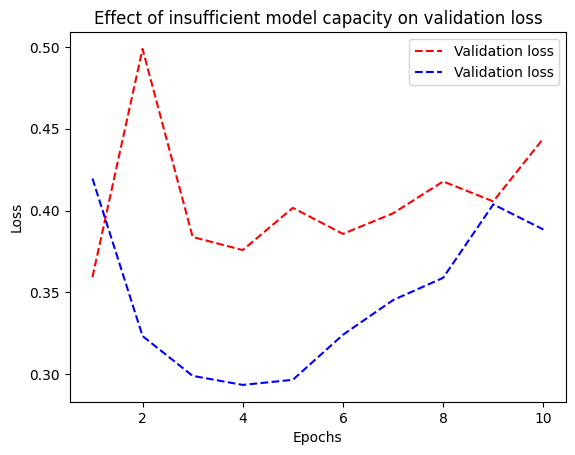

In [14]:
import matplotlib.pyplot as plt
l2_val_loss = history_l2_reg.history["val_loss"]
dropout_val_loss = history_dropout.history["val_loss"]
epochs = range(1, 11)
plt.plot(epochs, l2_val_loss, "r--",
         label="Validation loss")
plt.plot(epochs, dropout_val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

random하게 dropout하면 일종의 randomforest 형태의 트리가 된다. dependency가 생기지 않도록 함. specific한 noise에서. random하게 noise를 making

## Summary